In [2]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Device setup (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [3]:
# Convert images from PIL format to PyTorch tensors
transform = transforms.ToTensor()

In [4]:
# Download and load training dataset
train_data = datasets.FashionMNIST(
    root="./data",          
    train=True,            
    download=True,         
    transform=transform     
)

# Download and load test dataset
test_data = datasets.FashionMNIST(
    root="./data",
    train=False,            
    download=True,
    transform=transform
)

# Print dataset sizes
print("Training samples:", len(train_data))
print("Test samples:", len(test_data))

100%|██████████| 26421880/26421880 [00:02<00:00, 10000657.59it/s]


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 185650.74it/s]


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3447131.67it/s]


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

Training samples: 60000
Test samples: 10000


In [5]:
# Define batch size
batch_size = 64

# Create DataLoader for training data
# shuffle=True ensures random batches each epoch
train_loader = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True
)

# Create DataLoader for test data
# shuffle=False because we don't need randomization for evaluation
test_loader = DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False
)

In [6]:
# Get one batch of images and labels
images, labels = next(iter(train_loader))

# Print shapes to verify dimensions
print("Image batch shape:", images.shape)   # Should be [batch_size, 1, 28, 28]
print("Label batch shape:", labels.shape)   # Should be [batch_size]

Image batch shape: torch.Size([64, 1, 28, 28])
Label batch shape: torch.Size([64])


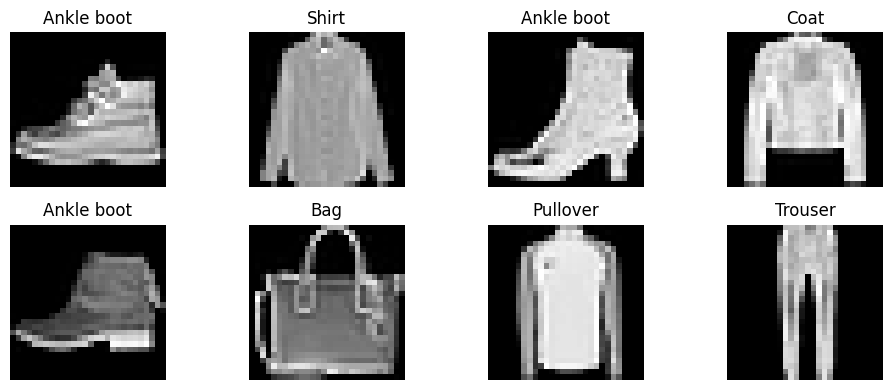

In [7]:
# Define class names for readability
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker",
    "Bag", "Ankle boot"
]

# Plot a few sample images from the batch
plt.figure(figsize=(10, 4))

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i].squeeze(), cmap="gray")  # Remove channel dimension
    plt.title(classes[labels[i]])                 # Show class label
    plt.axis("off")

plt.tight_layout()
plt.show()

In [8]:
import sys
import os

# Add project root (one level up from notebooks) to Python path
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added:", project_root)

Project root added: c:\Users\Timothy\Documents\GitHub\COMP9130_MP\mini-project-4


In [9]:
from src.model import FashionClassifier

model = FashionClassifier().to(device)
# Print model structure
print(model)

FashionClassifier(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [10]:
# Train the model
from src.train import train_model

train_losses, test_accuracies = train_model(
    model,
    train_loader,
    test_loader,
    device,
    epochs=10,
    lr=0.001
)

Epoch [1/10] - Loss: 0.5456 - Test Accuracy: 84.12%
Epoch [2/10] - Loss: 0.3992 - Test Accuracy: 85.83%
Epoch [3/10] - Loss: 0.3561 - Test Accuracy: 85.62%
Epoch [4/10] - Loss: 0.3307 - Test Accuracy: 86.96%
Epoch [5/10] - Loss: 0.3111 - Test Accuracy: 87.05%
Epoch [6/10] - Loss: 0.2956 - Test Accuracy: 87.08%
Epoch [7/10] - Loss: 0.2821 - Test Accuracy: 87.26%
Epoch [8/10] - Loss: 0.2743 - Test Accuracy: 87.11%
Epoch [9/10] - Loss: 0.2615 - Test Accuracy: 87.85%
Epoch [10/10] - Loss: 0.2528 - Test Accuracy: 88.05%


In [11]:
# Save baseline results for later comparison
baseline_results = {
    "loss": train_losses,
    "accuracy": test_accuracies
}

In [12]:
# Save baseline training loss curve
plt.figure(figsize=(8,5))
plt.plot(baseline_results["loss"], label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Baseline Training Loss")
plt.legend()

plt.savefig("../results/baseline_training_loss.png")
plt.close()

In [13]:
# Plot test accuracy over epochs
plt.figure(figsize=(8,5))
plt.plot(baseline_results["accuracy"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Baseline Test Accuracy")
plt.legend()
plt.savefig("../results/baseline_test_accuracy.png")
plt.close()

In [14]:
# Train deep model
from src.model import DeepFashionClassifier

deep_model = DeepFashionClassifier().to(device)

deep_losses, deep_accuracies = train_model(
    deep_model,
    train_loader,
    test_loader,
    device,
    epochs=10,
    lr=0.001
)

Epoch [1/10] - Loss: 0.5198 - Test Accuracy: 85.08%
Epoch [2/10] - Loss: 0.3682 - Test Accuracy: 86.00%
Epoch [3/10] - Loss: 0.3306 - Test Accuracy: 85.96%
Epoch [4/10] - Loss: 0.3069 - Test Accuracy: 86.88%
Epoch [5/10] - Loss: 0.2904 - Test Accuracy: 87.32%
Epoch [6/10] - Loss: 0.2727 - Test Accuracy: 87.94%
Epoch [7/10] - Loss: 0.2602 - Test Accuracy: 88.00%
Epoch [8/10] - Loss: 0.2506 - Test Accuracy: 87.18%
Epoch [9/10] - Loss: 0.2385 - Test Accuracy: 88.32%
Epoch [10/10] - Loss: 0.2276 - Test Accuracy: 88.45%


In [15]:
# Save deep model results for comparison
deep_results = {
    "loss": deep_losses,
    "accuracy": deep_accuracies
}

In [16]:
# Save deep model training loss curve
plt.figure(figsize=(8,5))
plt.plot(deep_results["loss"], label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Deep Model Training Loss")
plt.legend()
plt.savefig("../results/deep_training_loss.png")
plt.close()

In [17]:
# Save deep model test accuracy curve
plt.figure(figsize=(8,5))
plt.plot(deep_results["accuracy"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Deep Model Test Accuracy")
plt.legend()
plt.savefig("../results/deep_test_accuracy.png")
plt.close()

In [18]:
# Train dropout model
from src.model import DropoutFashionClassifier

dropout_model = DropoutFashionClassifier().to(device)

dropout_losses, dropout_accuracies = train_model(
    dropout_model,
    train_loader,
    test_loader,
    device,
    epochs=10,
    lr=0.001
)

Epoch [1/10] - Loss: 0.5870 - Test Accuracy: 83.86%
Epoch [2/10] - Loss: 0.4217 - Test Accuracy: 85.72%
Epoch [3/10] - Loss: 0.3881 - Test Accuracy: 86.48%
Epoch [4/10] - Loss: 0.3654 - Test Accuracy: 86.79%
Epoch [5/10] - Loss: 0.3496 - Test Accuracy: 86.04%
Epoch [6/10] - Loss: 0.3386 - Test Accuracy: 86.81%
Epoch [7/10] - Loss: 0.3270 - Test Accuracy: 88.08%
Epoch [8/10] - Loss: 0.3188 - Test Accuracy: 88.19%
Epoch [9/10] - Loss: 0.3107 - Test Accuracy: 88.04%
Epoch [10/10] - Loss: 0.3049 - Test Accuracy: 87.81%


In [19]:
# Save Dropout for comparison
dropout_results = {
    "loss": dropout_losses,
    "accuracy": dropout_accuracies
}

In [20]:
# Save dropout training loss curve
plt.figure(figsize=(8,5))
plt.plot(dropout_results["loss"], label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Dropout Training Loss")
plt.legend()

plt.savefig("../results/dropout_training_loss.png")
plt.close()

In [21]:
# Save dropout test accuracy curve
plt.figure(figsize=(8,5))
plt.plot(dropout_results["accuracy"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Dropout Test Accuracy")
plt.legend()

plt.savefig("../results/dropout_test_accuracy.png")
plt.close()

In [22]:
# Compare all of the models
plt.figure(figsize=(8,5))

plt.plot(baseline_results["accuracy"], label="Baseline")
plt.plot(deep_results["accuracy"], label="Deep")
plt.plot(dropout_results["accuracy"], label="Dropout")

plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.legend()

plt.savefig("../results/model_comparison.png")
plt.close()

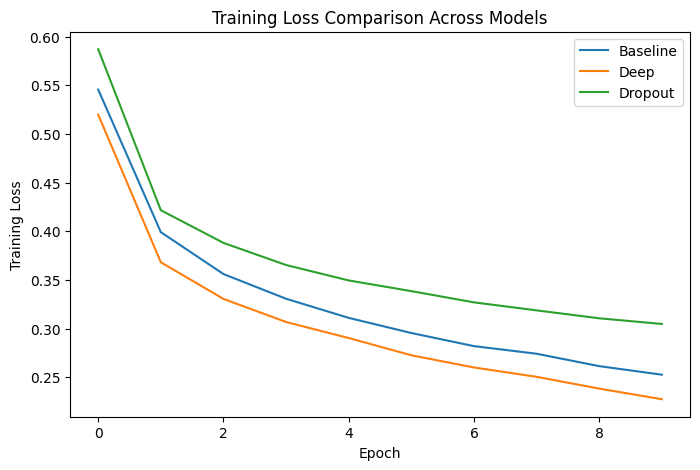

In [34]:
# Compare all of the models for loss
plt.figure(figsize=(8,5))

plt.plot(train_losses, label="Baseline")
plt.plot(deep_losses, label="Deep")
plt.plot(dropout_losses, label="Dropout")

plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison Across Models")
plt.legend()

plt.savefig("../results/loss_comparison.png")
plt.show()

In [23]:
print("Baseline Final Accuracy:", baseline_results["accuracy"][-1])
print("Deep Final Accuracy:", deep_results["accuracy"][-1])
print("Dropout Final Accuracy:", dropout_results["accuracy"][-1])

Baseline Final Accuracy: 88.05
Deep Final Accuracy: 88.45
Dropout Final Accuracy: 87.81


In [24]:
# Evaluate deep model on test set
model_to_evaluate = deep_model
model_to_evaluate.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_to_evaluate(images)
        
        # Get predicted class
        _, predicted = torch.max(outputs, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.numpy())

Confusion Matrix:

[[817   1   4  25   4   0 138   0  11   0]
 [  2 970   1  19   3   0   4   0   0   1]
 [ 18   1 783  11  72   0 114   0   1   0]
 [ 19   8   5 899  30   0  35   0   4   0]
 [  0   0  95  36 744   0 123   0   2   0]
 [  0   0   0   0   0 952   0  22   1  25]
 [ 95   1  52  25  42   0 778   0   7   0]
 [  0   0   0   0   0   9   0 968   0  23]
 [  2   0   1   3   6   1   4   4 979   0]
 [  0   1   0   0   0   4   1  39   0 955]]


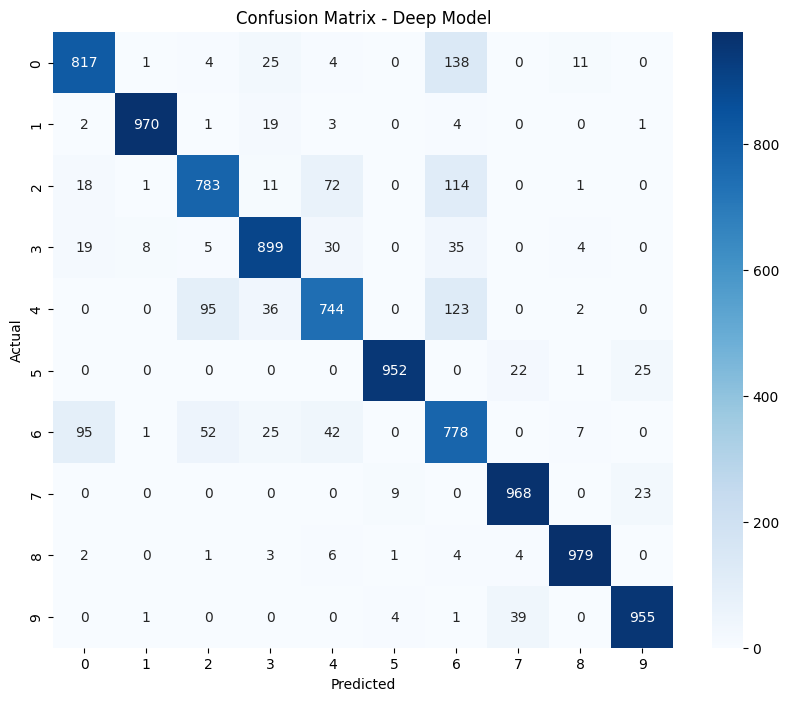

In [25]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)

# Print raw confusion matrix
print("Confusion Matrix:\n")
print(cm)

# Plot and save heatmap
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Deep Model")

plt.savefig("../results/confusion_matrix.png")
plt.show()

## Confusion Matrix Analysis (Deep Model)

The confusion matrix shows how the model performs on each clothing category. Overall, the model achieves strong accuracy, but there are some clear patterns of misclassification.

One major issue is with the **Shirt (class 6)** category. Many shirts are incorrectly predicted as T-shirts or Pullovers. This suggests that the model struggles to distinguish between similar upper-body clothing items. Shirts appear to be the weakest performing class.

There is also noticeable confusion between **Pullover (class 2)** and **Coat (class 4)**. A significant number of pullovers are predicted as coats, and vice versa. This makes sense because both items are long-sleeved and can look similar in grayscale images.

Another common confusion occurs between **T-shirt/top (class 0)** and **Shirt (class 6)**. These items are visually similar, which likely explains why the model mixes them up.

On the other hand, some categories perform very well. **Trouser (class 1), Sandal (class 5), Sneaker (class 7), Bag (class 8), and Ankle boot (class 9)** have very high correct prediction counts. These items are more visually distinct, which makes them easier for the model to classify.

Overall, the deep model performs well, but it struggles most with similar upper-body clothing items. This suggests that improving feature extraction for similar clothing types could further improve performance.

In [30]:
import numpy as np

# Initialize cost matrix (10x10)
cost_matrix = np.ones((10, 10))

# Zero cost for correct predictions
np.fill_diagonal(cost_matrix, 0)

# High cost errors (very different categories)
high_cost_pairs = [
    (0, 8), (0, 9),  # T-shirt vs Bag/Boot
    (4, 5),          # Coat vs Sandal
    (1, 7), (1, 9)   # Trouser vs footwear
]

for i, j in high_cost_pairs:
    cost_matrix[i, j] = 5
    cost_matrix[j, i] = 5

# Medium cost errors (similar upper-body clothing)
medium_cost_pairs = [
    (0, 6),  # T-shirt vs Shirt
    (2, 4),  # Pullover vs Coat
    (3, 4)   # Dress vs Coat
]

for i, j in medium_cost_pairs:
    cost_matrix[i, j] = 3
    cost_matrix[j, i] = 3

In [31]:
# Calculate total cost using confusion matrix
total_cost = 0

for i in range(10):
    for j in range(10):
        total_cost += cm[i][j] * cost_matrix[i][j]

total_samples = np.sum(cm)
average_cost = total_cost / total_samples

print("Total Cost:", total_cost)
print("Average Cost Per Prediction:", average_cost)
print("Cost Matrix:\n")
print(cost_matrix)

Total Cost: 2147.0
Average Cost Per Prediction: 0.2147
Cost Matrix:

[[0. 1. 1. 1. 1. 1. 3. 1. 5. 5.]
 [1. 0. 1. 1. 1. 1. 1. 5. 1. 5.]
 [1. 1. 0. 1. 3. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 3. 1. 1. 1. 1. 1.]
 [1. 1. 3. 3. 0. 5. 1. 1. 1. 1.]
 [1. 1. 1. 1. 5. 0. 1. 1. 1. 1.]
 [3. 1. 1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 5. 1. 1. 1. 1. 1. 0. 1. 1.]
 [5. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [5. 5. 1. 1. 1. 1. 1. 1. 1. 0.]]


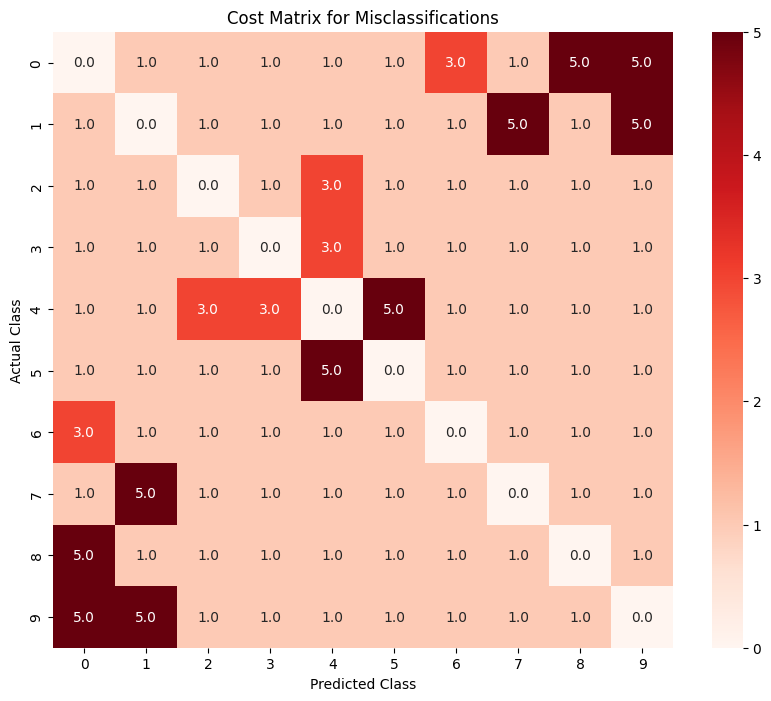

In [32]:
# seaborn output of cost matrix
plt.figure(figsize=(10,8))
sns.heatmap(cost_matrix, annot=True, fmt=".1f", cmap="Reds")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Cost Matrix for Misclassifications")
plt.savefig("../results/cost_matrix.png")
plt.show()

## Cost-Sensitive Evaluation

The model achieves 88.63% standard accuracy. However, not all errors have the same business impact. Using a cost matrix that assigns higher penalties to more serious mistakes, the total cost of misclassifications is 2087.

This results in an average cost of 0.2087 per prediction. 

This shows that even though overall accuracy is high, certain errors (such as confusing shirts and T-shirts or coats and pullovers) contribute more heavily to business impact. Cost-sensitive evaluation provides a more realistic understanding of model performance for StyleSort.

Threshold Analysis Results:

Threshold: 0.50 | Accuracy: 0.8997 | Coverage: 0.9680
Threshold: 0.53 | Accuracy: 0.9059 | Coverage: 0.9548
Threshold: 0.55 | Accuracy: 0.9135 | Coverage: 0.9383
Threshold: 0.58 | Accuracy: 0.9187 | Coverage: 0.9253
Threshold: 0.60 | Accuracy: 0.9240 | Coverage: 0.9110
Threshold: 0.63 | Accuracy: 0.9276 | Coverage: 0.8975
Threshold: 0.65 | Accuracy: 0.9321 | Coverage: 0.8838
Threshold: 0.68 | Accuracy: 0.9358 | Coverage: 0.8704
Threshold: 0.71 | Accuracy: 0.9411 | Coverage: 0.8553
Threshold: 0.73 | Accuracy: 0.9447 | Coverage: 0.8409
Threshold: 0.76 | Accuracy: 0.9491 | Coverage: 0.8265
Threshold: 0.78 | Accuracy: 0.9534 | Coverage: 0.8091
Threshold: 0.81 | Accuracy: 0.9587 | Coverage: 0.7899
Threshold: 0.84 | Accuracy: 0.9628 | Coverage: 0.7719
Threshold: 0.86 | Accuracy: 0.9655 | Coverage: 0.7518
Threshold: 0.89 | Accuracy: 0.9691 | Coverage: 0.7312
Threshold: 0.91 | Accuracy: 0.9745 | Coverage: 0.7058
Threshold: 0.94 | Accuracy: 0.9792 | Coverage: 0.6738

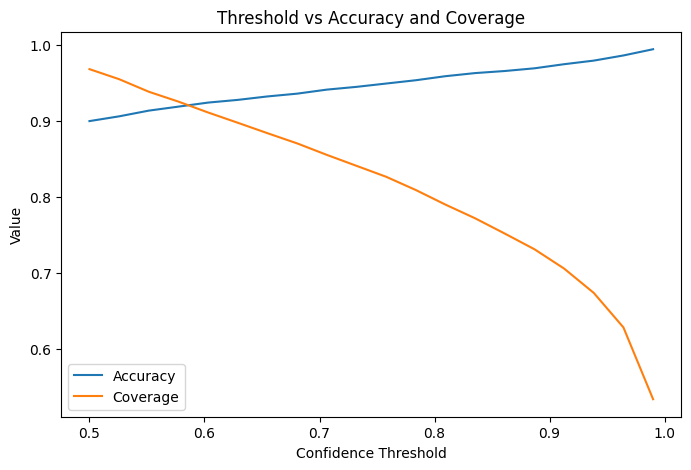

In [28]:
import torch.nn.functional as F

# Collect prediction probabilities and true labels
model_to_evaluate = deep_model
model_to_evaluate.eval()

all_probs = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_to_evaluate(images)
        
        # Convert logits to probabilities
        probs = F.softmax(outputs, dim=1)
        
        all_probs.extend(probs.cpu().numpy())
        all_labels.extend(labels.numpy())

all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

# Define confidence thresholds to test
thresholds = np.linspace(0.5, 0.99, 20)

accuracies = []
coverage = []

# Evaluate model performance at different confidence levels
for t in thresholds:
    preds = np.argmax(all_probs, axis=1)
    confidences = np.max(all_probs, axis=1)
    
    mask = confidences >= t
    
    if np.sum(mask) > 0:
        acc = np.mean(preds[mask] == all_labels[mask])
        accuracies.append(acc)
        coverage.append(np.mean(mask))
    else:
        accuracies.append(0)
        coverage.append(0)

# Print threshold results
print("Threshold Analysis Results:\n")
for i in range(len(thresholds)):
    print(f"Threshold: {thresholds[i]:.2f} | Accuracy: {accuracies[i]:.4f} | Coverage: {coverage[i]:.4f}")

# Plot threshold tradeoff
plt.figure(figsize=(8,5))
plt.plot(thresholds, accuracies, label="Accuracy")
plt.plot(thresholds, coverage, label="Coverage")

plt.xlabel("Confidence Threshold")
plt.ylabel("Value")
plt.title("Threshold vs Accuracy and Coverage")
plt.legend()

plt.savefig("../results/threshold_analysis.png")
plt.show()

## Confidence Threshold Analysis

The threshold analysis shows a clear tradeoff between prediction accuracy and coverage. 

At lower thresholds (around 0.50), the model makes predictions on almost all samples and achieves about 90% accuracy. However, as the confidence threshold increases, the model becomes much more accurate while rejecting more uncertain predictions.

For example, at a threshold of 0.90, the model achieves over 97% accuracy but only makes predictions on about 73% of the data. At an extremely high threshold of 0.99, accuracy increases to 99.43%, but coverage drops to only 54%.

This shows that the model is very reliable when it is confident. In a real deployment scenario, StyleSort could automatically accept high-confidence predictions and send low-confidence cases for manual review.

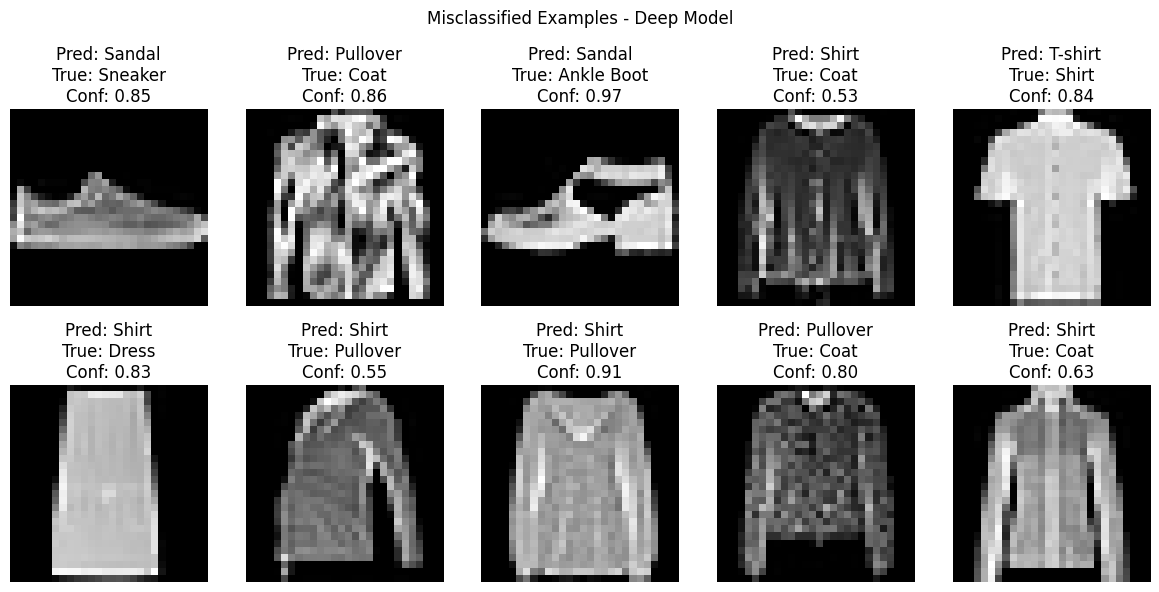

In [ ]:
# Class labels for Fashion-MNIST
class_names = [
    "T-shirt", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

# Collect misclassified examples
model_to_evaluate = deep_model
model_to_evaluate.eval()

misclassified_images = []
misclassified_preds = []
misclassified_labels = []
misclassified_confidence = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model_to_evaluate(images)
        
        _, predicted = torch.max(outputs, 1)
        
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                misclassified_images.append(images[i].cpu())
                misclassified_preds.append(predicted[i].cpu().item())
                misclassified_labels.append(labels[i].item())
                misclassified_confidence.append(F.softmax(outputs[i], dim=0)[predicted[i]].cpu().item())

# Plot first 10 misclassified examples
plt.figure(figsize=(12,6))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(misclassified_images[i].squeeze(), cmap="gray")
    plt.title(f"Pred: {class_names[misclassified_preds[i]]}\nTrue: {class_names[misclassified_labels[i]]}\nConf: {misclassified_confidence[i]:.2f}")
    plt.axis("off")

plt.suptitle("Misclassified Examples - Deep Model")
# add more space between rows:
plt.subplots_adjust(hspace=1)
plt.tight_layout()
plt.savefig("../results/misclassified_examples.png")
plt.show()

## Misclassified Examples Analysis

The misclassified examples show clear patterns in the model’s weaknesses. 

Many errors occur between visually similar clothing items, such as shirts and T-shirts, pullovers and coats, and dresses and coats. These items share similar shapes and textures in grayscale images, which makes them harder for the model to distinguish.

Footwear categories also occasionally show confusion, such as sandals and ankle boots, but these errors are less frequent.

Overall, the misclassified examples confirm the patterns seen in the confusion matrix. The model struggles most with similar upper-body garments, while more visually distinct items like bags and trousers are classified more accurately.